In [1]:
import pickle
import sklearn.metrics as met
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [32]:
trainData = np.load('../../fin_t2_train.npy')
trialData = np.load('../../fin_t2_trial.npy')
testData = np.load('../../fin_t2_test.npy')

noWEtrainData = np.load('../../noWE_t2_train.npy')
noWEtrialData = np.load('../../noWE_t2_trial.npy')
noWEtestData = np.load('../../noWE_t2_test.npy')



trainLabels = open('../../../dataFinal/finalTrainLabels.labels', 'r').readlines()
trialLabels = open('../../../dataFinal/finalDevLabels.labels','r').readlines()
testLabels = open('../../../dataFinal/finalTestLabels.labels', 'r').readlines()

In [33]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(trialLabels))):
    trialLabels[i] = int(trialLabels[i])

trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
trialLabels = np.array(trialLabels)

trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
trialLabels = trialLabels.reshape((-1, ))

100%|██████████| 10008/10008 [00:00<00:00, 1338411.33it/s]


In [ ]:
with open('svm_score.txt','a') as file:
    file.write("SVM - Bag of Words + Word Embeddings:\n\n")

    for c in [0.1,0.2,0.25,0.3,0.35,0.4,0.5,1,2,5]:
        file.write("C = {}:".format(c))
        train_acc = met.accuracy_score(trainLabels,train_predict)
        trial_acc = met.accuracy_score(trialLabels,trial_predict)
        test_acc = met.accuracy_score(testLabels,test_predict)
        train_prec = met.precision_score(trainLabels,train_predict,average='weighted')
        trial_prec = met.precision_score(trialLabels,trial_predict,average='weighted')
        test_prec = met.precision_score(testLabels,test_predict,average='weighted')
        train_rec = met.recall_score(trainLabels, train_predict,average='weighted')
        trial_rec = met.recall_score(trialLabels, trial_predict,average='weighted')
        test_rec = met.recall_score(testLabels, test_predict,average='weighted')
        train_f1 = met.f1_score(trainLabels,train_predict,average='weighted')
        trial_f1 = met.f1_score(trialLabels,trial_predict,average='weighted')
        test_f1 = met.f1_score(testLabels,test_predict,average='weighted')

        file.write("\n\tTrain Accuracy: {}".format(train_acc))
        file.write("\n\tTrain Precision: {}".format(train_prec))
        file.write("\n\tTrain Recall: {}".format(train_rec))
        file.write("\n\tTrain F1: {}".format(train_f1))
        file.write("\n")
        file.write("\n\tTrial Accuracy: {}".format(trial_acc))
        file.write("\n\tTrial Precision: {}".format(trial_prec))
        file.write("\n\tTrial Recall: {}".format(trial_rec))
        file.write("\n\tTrial F1: {}".format(trial_f1))
        file.write("\n")
        file.write("\n\tTest Accuracy: {}".format(test_acc))
        file.write("\n\tTest Precision: {}".format(test_prec))
        file.write("\n\tTest Recall: {}".format(test_rec))
        file.write("\n\tTest F1: {}".format(test_f1))
        file.write("\n\n")
    file.close()


In [ ]:
with open('svm_score.txt','a') as file:
    file.write("\n\nSVM - Bag of Words only:\n\n")

    for c in [0.1,0.2,0.25,0.3,0.35,0.4,0.5,1,2,5]:
        file.write("C = {}:".format(c))
        model = pickle.load(open('./models/noWE_SVM_linear_{}'.format(c),'rb'))
        train_predict = model.predict(noWEtrainData)
        trial_predict = model.predict(noWEtrialData)
        test_predict = model.predict(noWEtestData)
        train_acc = met.accuracy_score(trainLabels,train_predict)
        trial_acc = met.accuracy_score(trialLabels,trial_predict)
        test_acc = met.accuracy_score(testLabels,test_predict)
        train_prec = met.precision_score(trainLabels,train_predict,average='weighted')
        trial_prec = met.precision_score(trialLabels,trial_predict,average='weighted')
        test_prec = met.precision_score(testLabels,test_predict,average='weighted')
        train_rec = met.recall_score(trainLabels, train_predict,average='weighted')
        trial_rec = met.recall_score(trialLabels, trial_predict,average='weighted')
        test_rec = met.recall_score(testLabels, test_predict,average='weighted')
        train_f1 = met.f1_score(trainLabels,train_predict,average='weighted')
        trial_f1 = met.f1_score(trialLabels,trial_predict,average='weighted')
        test_f1 = met.f1_score(testLabels,test_predict,average='weighted')

        file.write("\n\tTrain Accuracy: {}".format(train_acc))
        file.write("\n\tTrain Precision: {}".format(train_prec))
        file.write("\n\tTrain Recall: {}".format(train_rec))
        file.write("\n\tTrain F1: {}".format(train_f1))
        file.write("\n")
        file.write("\n\tTrial Accuracy: {}".format(trial_acc))
        file.write("\n\tTrial Precision: {}".format(trial_prec))
        file.write("\n\tTrial Recall: {}".format(trial_rec))
        file.write("\n\tTrial F1: {}".format(trial_f1))
        file.write("\n")
        file.write("\n\tTest Accuracy: {}".format(test_acc))
        file.write("\n\tTest Precision: {}".format(test_prec))
        file.write("\n\tTest Recall: {}".format(test_rec))
        file.write("\n\tTest F1: {}".format(test_f1))
        file.write("\n\n")
    file.close()

In [34]:
c_list = [0.1,0.2,0.25,0.3,0.35,0.4,0.5,1,2,5]
train_acc_list = []
trial_acc_list = []
test_acc_list = []

In [8]:
for c in c_list:
        model = pickle.load(open('./models/SVM_linear_{}'.format(c),'rb'))
        train_predict = model.predict(trainData)
        trial_predict = model.predict(trialData)
        test_predict = model.predict(testData)
        train_acc = met.accuracy_score(trainLabels,train_predict)
        trial_acc = met.accuracy_score(trialLabels,trial_predict)
        test_acc = met.accuracy_score(testLabels,test_predict)
        train_acc_list.append(train_acc)
        trial_acc_list.append(trial_acc)
        test_acc_list.append(test_acc) 

/home/karan/.local/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/karan/.local/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


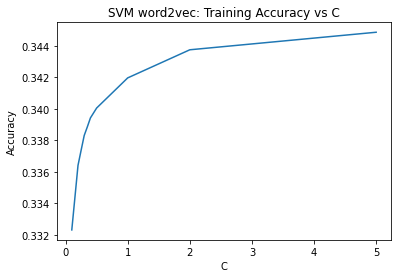

In [12]:
plt.plot(c_list,train_acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM word2vec: Training Accuracy vs C')
plt.show()

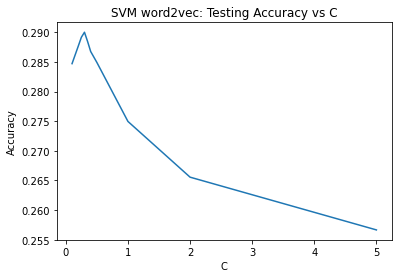

In [13]:
plt.plot(c_list,test_acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM word2vec: Testing Accuracy vs C')
plt.show()

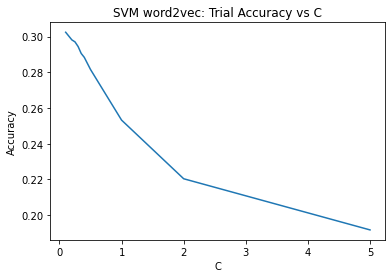

In [14]:
plt.plot(c_list,trial_acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM word2vec: Trial Accuracy vs C')
plt.show()

In [35]:
for c in c_list:
        model = pickle.load(open('./models/noWE_SVM_{}'.format(c),'rb'))
        train_predict = model.predict(noWEtrainData)
        trial_predict = model.predict(noWEtrialData)
        test_predict = model.predict(noWEtestData)
        train_acc = met.accuracy_score(trainLabels,train_predict)
        trial_acc = met.accuracy_score(trialLabels,trial_predict)
        test_acc = met.accuracy_score(testLabels,test_predict)
        train_acc_list.append(train_acc)
        trial_acc_list.append(trial_acc)
        test_acc_list.append(test_acc)

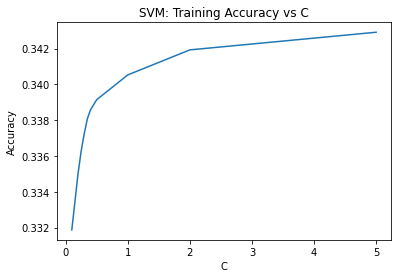

In [37]:
plt.plot(c_list,train_acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM: Training Accuracy vs C')
plt.show()

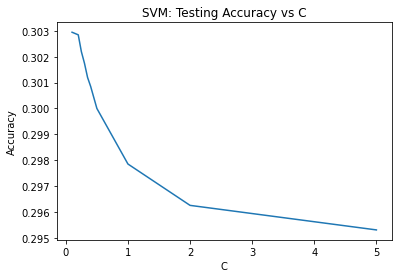

In [38]:
plt.plot(c_list,test_acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM: Testing Accuracy vs C')
plt.show()

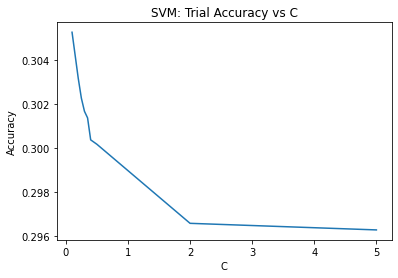

In [39]:
plt.plot(c_list,trial_acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM: Trial Accuracy vs C')
plt.show()